In [1]:
library(tidyverse)
library(annotatr)

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.4
√ tidyr   0.8.0     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()






In [39]:
dm_file <- "First_CpG_island_filtered-Avg_by_Island.txt.modified"
extraCols = c(diff_meth = 'numeric', mu0 = 'numeric', mu1 = 'numeric', gene = "character")
dm_regions = read_regions(con = dm_file, genome = 'hg19', extraCols = extraCols, format = 'bed',
    rename_name = 'DM_status', rename_score = 'pval')
print(head(dm_regions))


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching package: 'S4Vectors'

The following objects are maske

GRanges object with 6 ranges and 6 metadata columns:
      seqnames                 ranges strand |   DM_status        pval
         <Rle>              <IRanges>  <Rle> | <character>   <numeric>
  [1]     chr1 [111215699, 111220378]      * |       hyper 0.011754390
  [2]     chr1 [113495899, 113500888]      * |       hyper 0.027974279
  [3]     chr1 [161494007, 161498126]      * |       hyper 0.037749551
  [4]     chr1 [205028939, 205033058]      * |       hyper 0.015268072
  [5]     chr1 [  2408316,   2412497]      * |       hyper 0.037749551
  [6]     chr1 [ 38411152,  38415391]      * |       hyper 0.005530727
      diff_meth       mu0        mu1                gene
      <numeric> <numeric>  <numeric>         <character>
  [1] 0.8194444 0.8750000 0.05555556               KCNA3
  [2] 0.7380952 0.8333333 0.09523810 SLC16A1,SLC16A1-AS1
  [3] 0.8333333 0.8333333 0.00000000               HSPA6
  [4] 0.8888889 1.0000000 0.11111111    AL583832.1,CNTN2
  [5] 0.8333333 1.0000000 0.16666667 

In [40]:
annots = c('hg19_cpgs', 'hg19_basicgenes', 'hg19_genes_intergenic', 'hg19_genes_promoters')

In [41]:
annotations = build_annotations(genome = 'hg19', annotations = annots)

Loading required package: GenomicFeatures
Loading required package: AnnotationDbi
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'AnnotationDbi'

The following object is masked from 'package:dplyr':

    select

'select()' returned 1:1 mapping between keys and columns
Building promoters...
Building 1to5kb upstream of TSS...
Building intergenic...
Building 5UTRs...
Building 3UTRs...
Building exons...
Building introns...
snapshotDate(): 2017-10-27
Building CpG islands...
loading from cache 'C:/Users/DGL8/Documents/AppData/.AnnotationHub/5086'
Building CpG shores...
Building CpG shelves...
Building inter-CpG-islands...


In [42]:
dm_annotated = annotate_regions(
    regions = dm_regions,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = FALSE)
# A GRanges object is returned
print(dm_annotated)

Annotating...


GRanges object with 3844 ranges and 7 metadata columns:
         seqnames                 ranges strand |   DM_status       pval
            <Rle>              <IRanges>  <Rle> | <character>  <numeric>
     [1]     chr1 [111215699, 111220378]      * |       hyper 0.01175439
     [2]     chr1 [111215699, 111220378]      * |       hyper 0.01175439
     [3]     chr1 [111215699, 111220378]      * |       hyper 0.01175439
     [4]     chr1 [111215699, 111220378]      * |       hyper 0.01175439
     [5]     chr1 [111215699, 111220378]      * |       hyper 0.01175439
     ...      ...                    ...    ... .         ...        ...
  [3840]     chrY     [2655277, 2659376]      * |        hypo 0.02609861
  [3841]     chrY     [2655277, 2659376]      * |        hypo 0.02609861
  [3842]     chrY     [2655277, 2659376]      * |        hypo 0.02609861
  [3843]     chrY     [2655277, 2659376]      * |        hypo 0.02609861
  [3844]     chrY     [2655277, 2659376]      * |        hypo 0.0260

In [43]:
df_dm_annotated = data.frame(dm_annotated)
print(head(df_dm_annotated))

  seqnames     start       end width strand DM_status       pval diff_meth
1     chr1 111215699 111220378  4680      *     hyper 0.01175439 0.8194444
2     chr1 111215699 111220378  4680      *     hyper 0.01175439 0.8194444
3     chr1 111215699 111220378  4680      *     hyper 0.01175439 0.8194444
4     chr1 111215699 111220378  4680      *     hyper 0.01175439 0.8194444
5     chr1 111215699 111220378  4680      *     hyper 0.01175439 0.8194444
6     chr1 111215699 111220378  4680      *     hyper 0.01175439 0.8194444
    mu0        mu1  gene annot.seqnames annot.start annot.end annot.width
1 0.875 0.05555556 KCNA3           chr1   111217656 111218655        1000
2 0.875 0.05555556 KCNA3           chr1   111218656 111222655        4000
3 0.875 0.05555556 KCNA3           chr1   111217432 111217655         224
4 0.875 0.05555556 KCNA3           chr1   111214310 111217655        3346
5 0.875 0.05555556 KCNA3           chr1   111214310 111215703        1394
6 0.875 0.05555556 KCNA3       

In [44]:
dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
print(dm_annsum)

# A tibble: 11 x 2
   annot.type                n
   <chr>                 <int>
 1 hg19_cpg_inter           48
 2 hg19_cpg_islands        110
 3 hg19_cpg_shelves         88
 4 hg19_cpg_shores         119
 5 hg19_genes_1to5kb       113
 6 hg19_genes_3UTRs         45
 7 hg19_genes_5UTRs        100
 8 hg19_genes_exons        144
 9 hg19_genes_intergenic    26
10 hg19_genes_introns      130
11 hg19_genes_promoters    115


Warning message in subset_order_tbl(tbl = annotated_regions, col = "annot.type", :
"There are elements in col_order that are not present in the corresponding column. Check for typos, or this could be a result of 0 tallies."

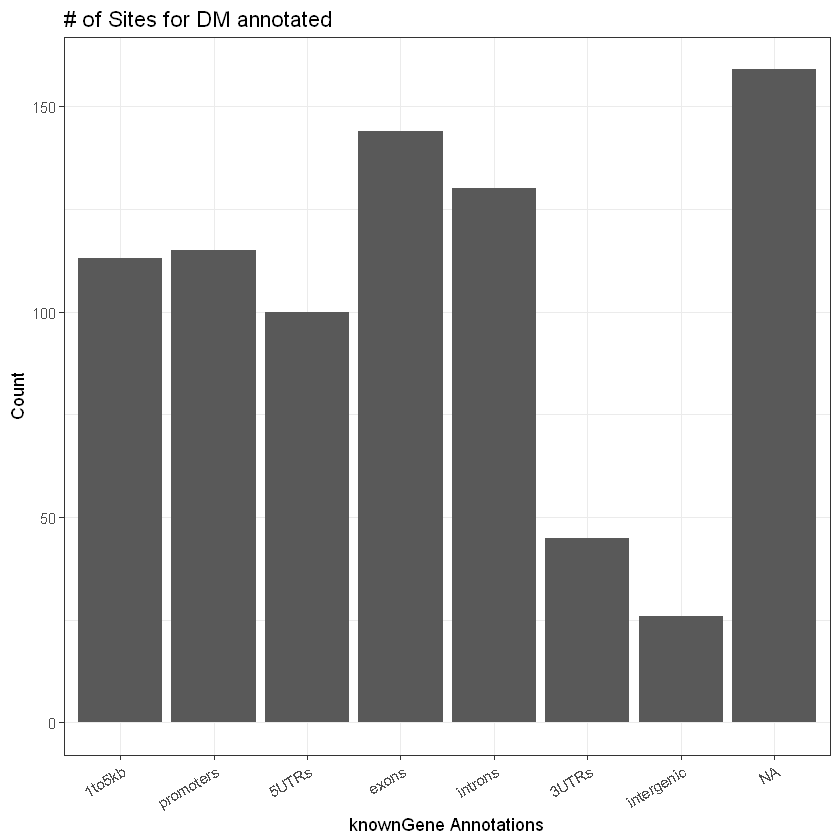

In [46]:
annots_order = c(
    'hg19_custom_ezh2',
    'hg19_H3K4me3_Gm12878',
    'hg19_genes_1to5kb',
    'hg19_genes_promoters',
    'hg19_genes_5UTRs',
    'hg19_genes_exons',
    'hg19_genes_intronexonboundaries',
    'hg19_genes_introns',
    'hg19_genes_3UTRs',
    'hg19_genes_intergenic')
dm_vs_kg_annotations = plot_annotation(
    annotated_regions = dm_annotated,
    annotation_order = annots_order,
    plot_title = '# of Sites for DM annotated',
    x_label = 'knownGene Annotations',
    y_label = 'Count')
print(dm_vs_kg_annotations)

Warning message in subset_order_tbl(tbl = tbl, col = facet, col_order = facet_order):
"There are elements in col_order that are not present in the corresponding column. Check for typos, or this could be a result of 0 tallies."

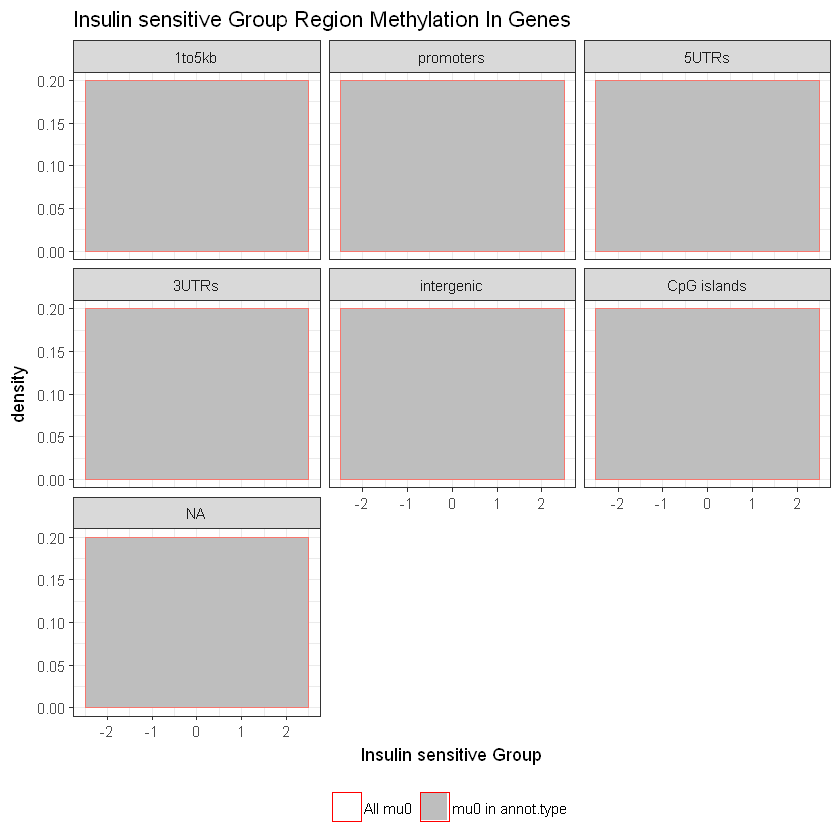

In [47]:
dm_vs_regions_annot = plot_numerical(
    annotated_regions = dm_annotated,
    x = 'mu0',
    facet = 'annot.type',
    facet_order = c('hg19_genes_1to5kb','hg19_genes_promoters',
        'hg19_genes_5UTRs','hg19_genes_3UTRs', 'hg19_custom_ezh2',
        'hg19_genes_intergenic', 'hg19_cpg_islands'),
    bin_width = 5,
    plot_title = 'Insulin sensitive Group Region Methylation In Genes',
    x_label = 'Insulin sensitive Group')
print(dm_vs_regions_annot)

Warning message in subset_order_tbl(tbl = tbl, col = facet, col_order = facet_order):
"There are elements in col_order that are not present in the corresponding column. Check for typos, or this could be a result of 0 tallies."

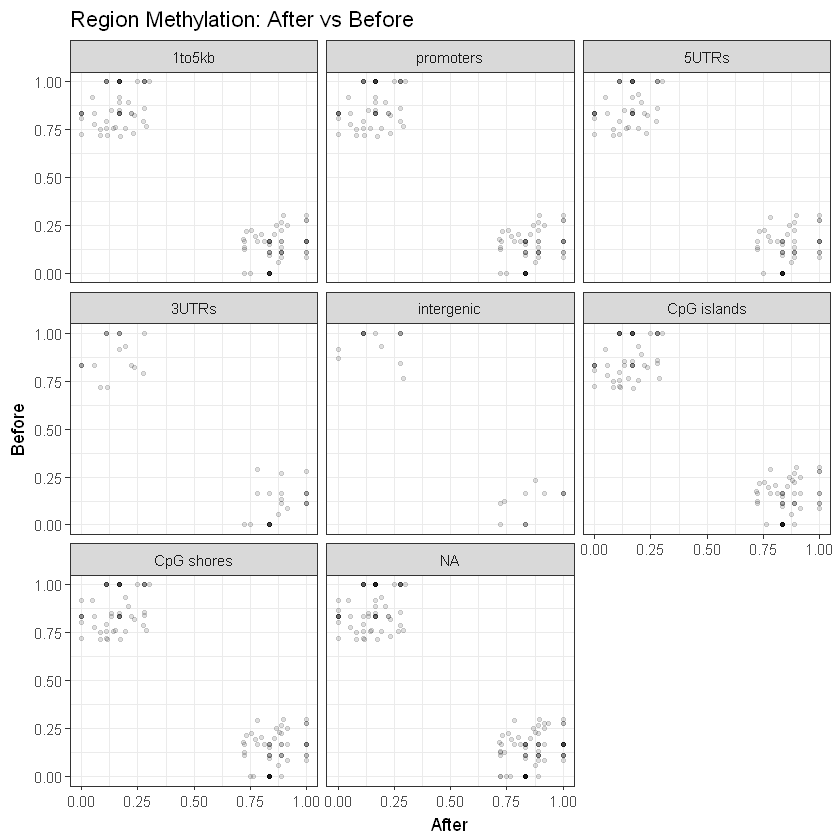

In [51]:
dm_vs_regions_name = plot_numerical(
    annotated_regions = dm_annotated,
    x = 'mu0',
    y = 'mu1',
    facet = 'annot.type',
    facet_order = c('hg19_genes_1to5kb','hg19_genes_promoters',
        'hg19_genes_5UTRs','hg19_genes_3UTRs', 'hg19_custom_ezh2',
        'hg19_genes_intergenic', 'hg19_cpg_islands', 'hg19_cpg_shores'),
    plot_title = 'Region Methylation: After vs Before',
    x_label = 'After',
    y_label = 'Before')
print(dm_vs_regions_name)

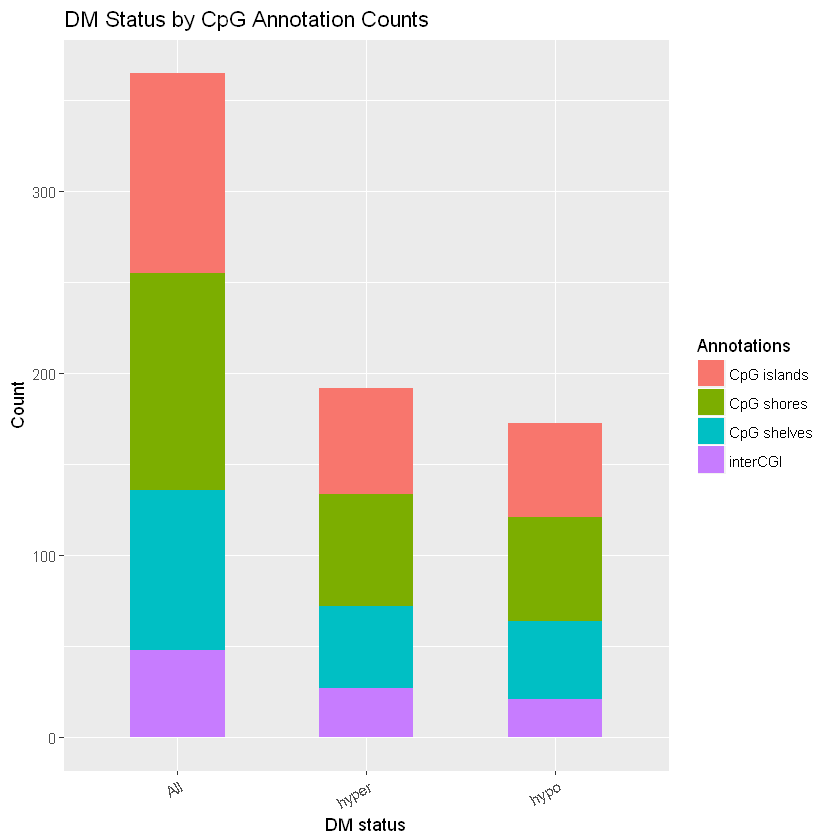

In [52]:
x_order = c(
    'hyper',
    'hypo')
# The orders for the fill labels. Can also use this
# parameter to subset annotation types to fill.
fill_order = c(
    'hg19_cpg_islands',
    'hg19_cpg_shores',
    'hg19_cpg_shelves',
    'hg19_cpg_inter')
# Make a barplot of the data class where each bar
# is composed of the counts of CpG annotations.
dm_vs_cpg_cat1 = plot_categorical(
    annotated_regions = dm_annotated, x='DM_status', fill='annot.type',
    x_order = x_order, fill_order = fill_order, position='stack',
    plot_title = 'DM Status by CpG Annotation Counts',
    legend_title = 'Annotations',
    x_label = 'DM status',
    y_label = 'Count')
print(dm_vs_cpg_cat1)

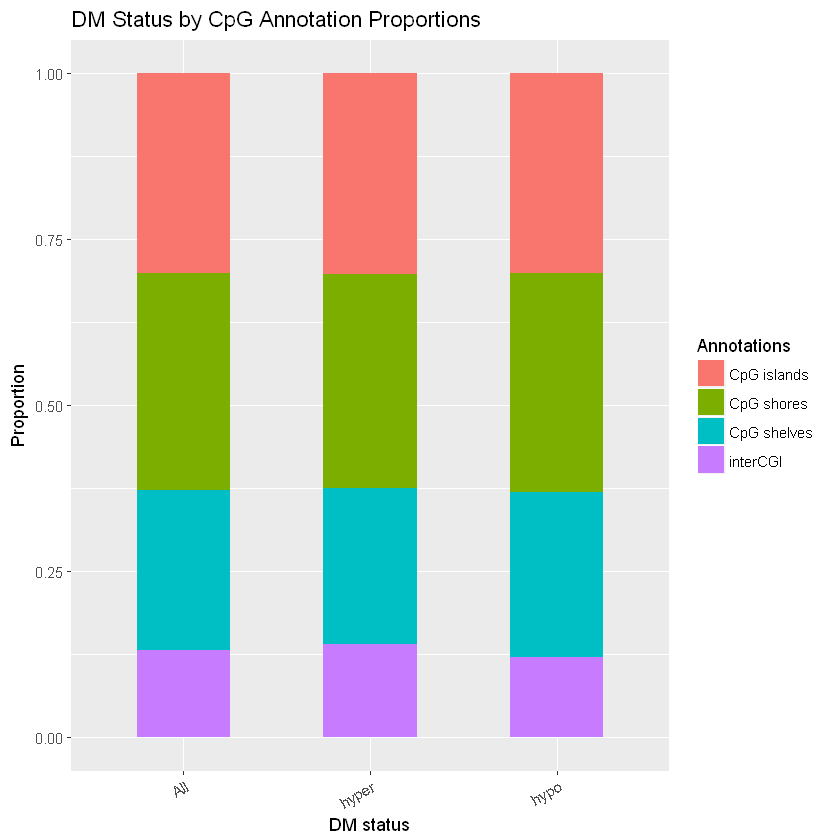

In [53]:
dm_vs_cpg_cat2 = plot_categorical(
    annotated_regions = dm_annotated, x='DM_status', fill='annot.type',
    x_order = x_order, fill_order = fill_order, position='fill',
    plot_title = 'DM Status by CpG Annotation Proportions',
    legend_title = 'Annotations',
    x_label = 'DM status',
    y_label = 'Proportion')
print(dm_vs_cpg_cat2)